# Part I - Exploring Prosper Loan Data
## by Israel Ogunmola

## Introduction
---

If you want to consolidate debt, finance a large purchase, or cover an emergency expense, a personal loan can be immensely useful. However, many personal loan lenders require borrowers to have good or excellent credit, making it difficult to qualify for a loan. Borrowers with credit ratings in the fair range or below may have better chances of obtaining loans at a better rate by working with a peer-to-peer lender.

[Prosper is a personal loan pioneer](https://www.prosper.com/) — the US company became the first firm to enter the peer-to-peer lending arena when it launched in 2005. Since then, the platfom has originated more than 20 billion USD in personal loans by matching over 1,170,000 borrowers to potential investors through its online platform. Prosper offers unsecured personal loans to customers who have a minimum credit score of 640. It also provides home equity lines of credit (HELOCs).

Our goal is to explore a sample of Prosper loan data to uncover borrower motivations when applying for loans, and identify several factors that may influence loan favorability.

## Importing Libraries
---
 
A great way to start is by importing the libraries and packages we need. We will import the **Numpy** and **Pandas** libraries to help us load and perform quick, vectorized operations on our data, then the **Matplotlib** and **Seaborn** libraries to help us build informing visuals:

In [1]:
# Data analysis and visualization packages
import numpy as np
import pandas as pd
import requests
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization behaviours
%matplotlib inline
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

## Preliminary Wrangling
---
We will start by importing our dataset, `prosperLoanData.csv`, then reading it into a pandas dataframe:

In [2]:
df = pd.read_csv('./prosperLoanData.csv')

In [3]:
# Display quick summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Initial Notes on Dataset Structure:
>- The dataframe comprises **113,937** rows and **81** columns (features). 56 of these 81 columns (69%) contain numeric data. There is a wealth of information that describes the situations surrounding each loan in the dataset.

### Features of Interest
The dataset currently contains loads of information. However, the goal of this exploration is to understand the different borrower motivations when applying for loans, including the different factors that may influence loan favorability. As a result, we will direct our exploratory efforts towards the following features:
>(1.) **ListingCreationDate:** The date the listing was created.

>(2.) **ListingCategory (numeric):** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

>(3.) **BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

>(4.) **isBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

>(5.) **IncomeRange:** The income range of the borrower at the time the listing was created.

>(6.) **IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.

>(7.) **DebtToIncomeRatio:** The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

>(8.) **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.

>(9.) **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.

>(10.) **Term:** The length of the loan expressed in months.

>(11.) **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

>(12.) **LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

>(13.) **LoanOriginalAmount:** The origination amount of the loan.

>(14.) **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.

Generally, we aim to measure loan favorability in terms of **Prosper rating** and **Annual percentage rate (borrower APR)**.

## Data Assessment
---
We will now assess our dataframe, with particular focus on the features of interest. The major goal here is data exploration, hence findings on quality and tidiness will be collated under the assessment summary, and addressed using a brief and concise cleaning workflow.

First, let's create a list containing the key features for our analysis:

In [4]:
# Create a list of key feature names
key_features = ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']

Next, we will examine a sample of records from these features in pandas, coupled with thorough visual assessments in a spreadsheet software like Ms Excel:

In [5]:
# Visually assess portions of the dataframe containing key features
df[key_features].sample(20)

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR
21161,2010-09-01 11:55:34.210000000,1,GA,True,"$25,000-49,999",True,0.30000,2083.333333,36,HR,Full-time,Completed,1500,0.21523
77366,2013-10-11 01:11:16.190000000,1,NV,False,"$50,000-74,999",True,0.22000,4916.666667,60,D,Employed,Current,13000,0.26333
90925,2007-11-19 04:46:41.540000000,0,MD,True,"$100,000+",True,0.14000,11250.000000,36,NaN,Full-time,Completed,9000,0.12700
17625,2013-06-12 08:14:14.717000000,7,OH,False,"$1-24,999",True,0.50000,1500.000000,36,C,Employed,Current,4000,0.22712
48952,2013-07-12 08:04:13.423000000,1,FL,True,"$1-24,999",True,0.36000,1137.000000,36,D,Other,Current,4000,0.29537
7768,2007-08-09 09:29:17.980000000,0,OH,True,"$25,000-49,999",True,0.17000,3208.333333,36,NaN,Full-time,Completed,3000,0.22241
97119,2013-06-13 13:46:52.023000000,1,MA,True,"$75,000-99,999",True,0.14000,6500.000000,60,A,Employed,Current,20000,0.14965
39370,2013-09-12 16:56:41.283000000,1,IL,False,"$25,000-49,999",True,0.20000,3916.666667,60,E,Employed,Current,10000,0.29618
39788,2011-10-25 14:16:30.013000000,3,TX,False,Not employed,False,NaN,0.000000,36,HR,Not employed,Chargedoff,4000,0.35643
60848,2013-09-18 10:13:36.430000000,7,NJ,False,"$25,000-49,999",True,0.43000,4003.000000,36,D,Employed,Current,10000,0.24614


Finally, we will check for duplicates, then preview a quick summary of these features, to get an idea of the overall distribution of datatypes, null values and the nomenclature of the column names:

In [6]:
# Examine for duplicates
duplicates = df[key_features].duplicated().sum()
print('There are {} duplicate records in the dataset'.format(duplicates))

There are 871 duplicate records in the dataset


In [7]:
df[key_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   IncomeVerifiable           113937 non-null  bool   
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

### Assessment Summary
Visual and programmatic assessments, with regards to the features of interest, yeilded the following observations:
> 1. Key features need to be isolated from the dataset.
> 2. There are 871 duplicate records in the dataset.
> 3. **ListingCategory (numeric)** and **ProsperRating (Alpha)** can be reassigned with column names that are easier to work with.
> 4. **ListingCreationDate** is stored with the wrong datatype. It should be a pandas datetime object.
> 5. The numeric information in **ListingCategory (numeric)** could be better expanded to reflect the actual reasons for the loan. The data dictionary contains helpful information for this.
> 6. _Not employed_ entries in **IncomeRange** could be safely replaced with _0_.
> 7. Key features for loan favorability (**BorrowerAPR** and **ProsperRating (Alpha)**) contain null values. The **DebtToIncomeRatio** column also contains null values.
> 8. **ProsperRating** and **IncomeRange** are ordinal categorical variables and should be stored in ordered form.
> 9. Longitude and Latitude information can be collected from external sources to make **BorrowerState** visualizations easier.

## Data Cleaning
---
We will start by creating a copy of the original dataframe, then address each identified issue with brief cleaning workflows:

In [8]:
clean_df = df.copy()

#### 1. Isolate key features from the dataframe

In [9]:
# Filter out the key features from the original dataframe
clean_df = clean_df[key_features]

# Verify the changes made
assert len(clean_df.columns) == len(key_features)

#### 2. Drop the duplicate records from the dataframe

In [10]:
clean_df = clean_df.drop_duplicates()

# Verify results
assert not clean_df.duplicated().any()

#### 3. Reassign ListingCategory (numeric) and ProsperRating (Alpha) with proper column names

In [11]:
# Rename the columns
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in clean_df.columns

#### 4. Convert ListingCreationDate to DateTime object_

In [12]:
clean_df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

# Verify results
clean_df.dtypes[0:2]

ListingCreationDate    datetime64[ns]
ListingCategory                 int64
dtype: object

#### 5. Map the ListingCategory column to the right category titles

In [13]:
# Store all the numeric categories and their titles in a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
clean_df.ListingCategory = clean_df.ListingCategory.map(category_titles)

# Preview results
clean_df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### 6. Replace 'Not employed' entries in IncomeRange with $0

In [14]:
clean_df.IncomeRange = clean_df.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
assert 'Not employed' not in clean_df.IncomeRange

#### 7. Address the null values in BorrowerAPR, ProsperRating, and DebtToIncomeRatio columns
**BorrowerAPR** and **ProsperRating** are integral to our analysis. They are our dependent variables. Hence, it is important to maintain the integrity of their data. We will drop the null values if their combined sum is **lesser than 30%** of the records in our entire dataframe. This ensures that we have enough data to analyze even after the null values have been removed.

Values in the **DebtToIncomeRatio** column can be null if:
>- The borrower has never taken a debt on the platform before.
>- The borrower is currently not servicing any debt.
 
As a result, we will only be dealing with null values in the _BorrowerAPR and ProsperRating_ columns.

In [15]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

# Estimate the number of null records in each column with a list comprehension
null_counts = [clean_df[col].isnull().sum() for col in null_columns]

# Calculate the total proportion of null values in the dataframe
null_proportion = sum(null_counts) / df.shape[0]

print('The combined percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The combined percentage of null records is 25.5%


Since the combined percentage is lesser than 30%, we will proceed to drop the null records from our dataframe:

In [16]:
# Filter out null values from the dataframe
for col in null_columns:
    clean_df = clean_df[clean_df[col].notnull()]

# Verify results
for col in null_columns:
    assert clean_df[col].notnull().any()

#### 8. Convert ProsperRating and IncomeRange columns to ordered categorical types

In [17]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    clean_df[key] = clean_df[key].astype(correct_order)

# Verify changes
clean_df[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

## Gathering Additional Data
---
The information in the **BorrowerState** column is an abbreviation of the different states in the US, depending on the borrower location. To conveniently visualize and explore this kind of information, we will need to pull data from outside sources, especially one that contains the full name, latitude and longitude for each state.

A kaggle user [Washim Ahmed](https://www.kaggle.com/washimahmed), has already uploaded this information online. We will download [the csv file](https://www.kaggle.com/datasets/washimahmed/usa-latlong-for-state-abbreviations?resource=download&select=statelatlong.csv) programatically, using the requests library:

In [18]:
# Programmatically download the csv file
# url = 'https://cutt.ly/fLuimKG'
# response = requests.get(url)
# with open('state_data.csv', 'wb') as file:
#     file.write(response.content)

In [19]:
# Read-in the newly downloaded dataframe
state_df = pd.read_csv('./state_data.csv')
state_df.head(3)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona


Next, we merge the state dataframe into our cleaned dataframe:

In [20]:
# Merge clean_df and state_df
loan_df = pd.merge(clean_df, state_df, left_on='BorrowerState', right_on='State')
loan_df.head(3)

,ListingCreationDate,ListingCategory,BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating,EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,State,Latitude,Longitude,City
0,2014-02-27 08:28:07.900,Home Improvement,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016,CO,38.997934,-105.550567,Colorado
1,2010-06-16 16:23:44.533,Debt Consolidation,CO,True,"$75,000-99,999",True,0.26,6666.666667,36,A,Full-time,Completed,4000,0.11296,CO,38.997934,-105.550567,Colorado
2,2013-05-01 08:18:59.183,Debt Consolidation,CO,True,"$50,000-74,999",True,0.35,5416.666667,36,A,Employed,Current,15000,0.15833,CO,38.997934,-105.550567,Colorado


Finally, we will assign the full state name to the **BorrowerState** column, then drop unwanted or redundant columns like **State** and **City**:

In [21]:
# Rename and drop redundant columns
loan_df.BorrowerState = loan_df.City
loan_df.drop(columns = ['State', 'City'], inplace=True)

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 0 to 83981
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingCreationDate  83982 non-null  datetime64[ns]
 1   ListingCategory      83982 non-null  object        
 2   BorrowerState        83982 non-null  object        
 3   IsBorrowerHomeowner  83982 non-null  bool          
 4   IncomeRange          83982 non-null  category      
 5   IncomeVerifiable     83982 non-null  bool          
 6   DebtToIncomeRatio    76768 non-null  float64       
 7   StatedMonthlyIncome  83982 non-null  float64       
 8   Term                 83982 non-null  int64         
 9   ProsperRating        83982 non-null  category      
 10  EmploymentStatus     83982 non-null  object        
 11  LoanStatus           83982 non-null  object        
 12  LoanOriginalAmount   83982 non-null  int64         
 13  BorrowerAPR          83982 non-

Our final dataframe comprises **83,982** rows and **16** colums. This is sufficient enough for exploratory analysis.

## Exploratory Data Analysis
---
We will explore our data systematically by building univariate, bivariate and multivariate visualizations. The Question-Visualization-Observations frame work will be utilized throughout the exploration process. 

To build an intuition of how the numeric values are distributed, it is advisable to compute the descriptive statistics of the relevant numeric columns. This will be immensely helpful when configuring histogram bins during univariate explorations.

In [23]:
# Compute descriptive statistics for all numeric columns
loan_df.describe()

,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR,Latitude,Longitude
count,76768.000000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000
mean,0.258692,5.930614e+03,42.462813,9061.224381,0.226945,37.657466,-91.232628
std,0.319727,8.268432e+03,11.639032,6279.649648,0.080047,4.721124,16.090169
min,0.000000,0.000000e+00,12.000000,1000.000000,0.045830,20.460000,-158.775020
25%,0.150000,3.426938e+03,36.000000,4000.000000,0.163610,35.214563,-100.076842
50%,0.220000,5.000000e+03,36.000000,7500.000000,0.219450,38.498779,-86.415805
75%,0.320000,7.083333e+03,60.000000,13500.000000,0.292540,40.705626,-79.458786
max,10.010000,1.750003e+06,60.000000,35000.000000,0.423950,61.302501,-71.506451


### A. Univariate Exploration
---
The BorrowerAPR (Annual percentage rate) is one of our key features of interest. Let's start by exploring how the feature is distributed throughout our loan dataset:
#### Question One: How are Borrower APR values distributed in the dataset, do the majority of loans have high or low APR values?
   
#### Visualization

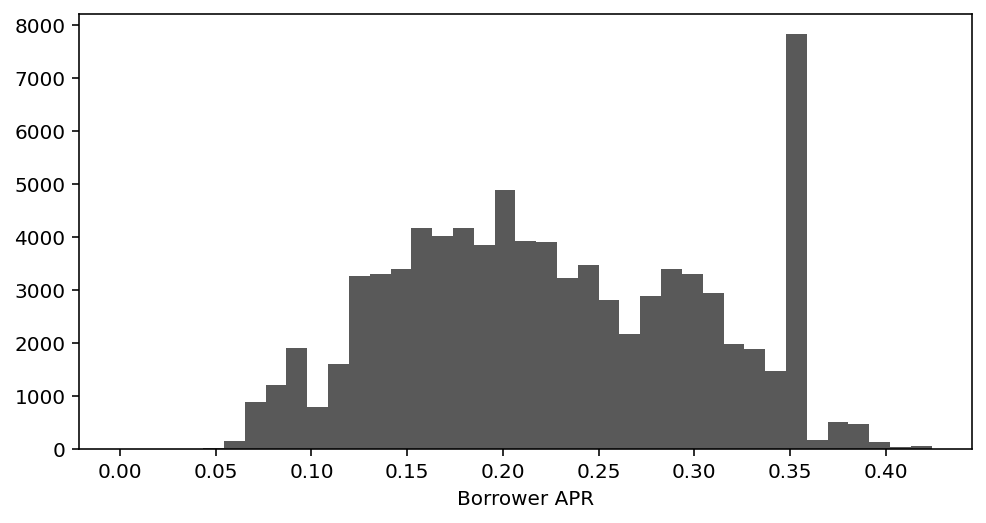

In [24]:
# Set color for all univariate plots
main_color = sns.color_palette()[3]

# Create 40 evenly spaced bins for Borrower APR from zero to the maximum value
bins = np.linspace(0, loan_df.BorrowerAPR.max(), 40)

plt.figure(figsize=(8, 4))
plt.hist(data=loan_df, x='BorrowerAPR', bins=bins, color = main_color);
plt.xticks(np.arange(0, 0.45, 0.05))
plt.xlabel('Borrower APR');

#### Observations
>-  Borrower APR appears to follow a multimodal distribution, with peaks around 0.09, 0.2 and 0.3 respectively. A very sharp peak can also be seen between 0.35 and 0.36. In general, only few listings have borrower APR greater than 0.4.

Next, we will explore the debt-to-income ratio feature for some quick insights into possible borrower preferences.
  
#### Question Two: How are the values for Debt-to-income ratio distributed, are borrowers taking more debt than their income could possibly handle?
#### Visualization

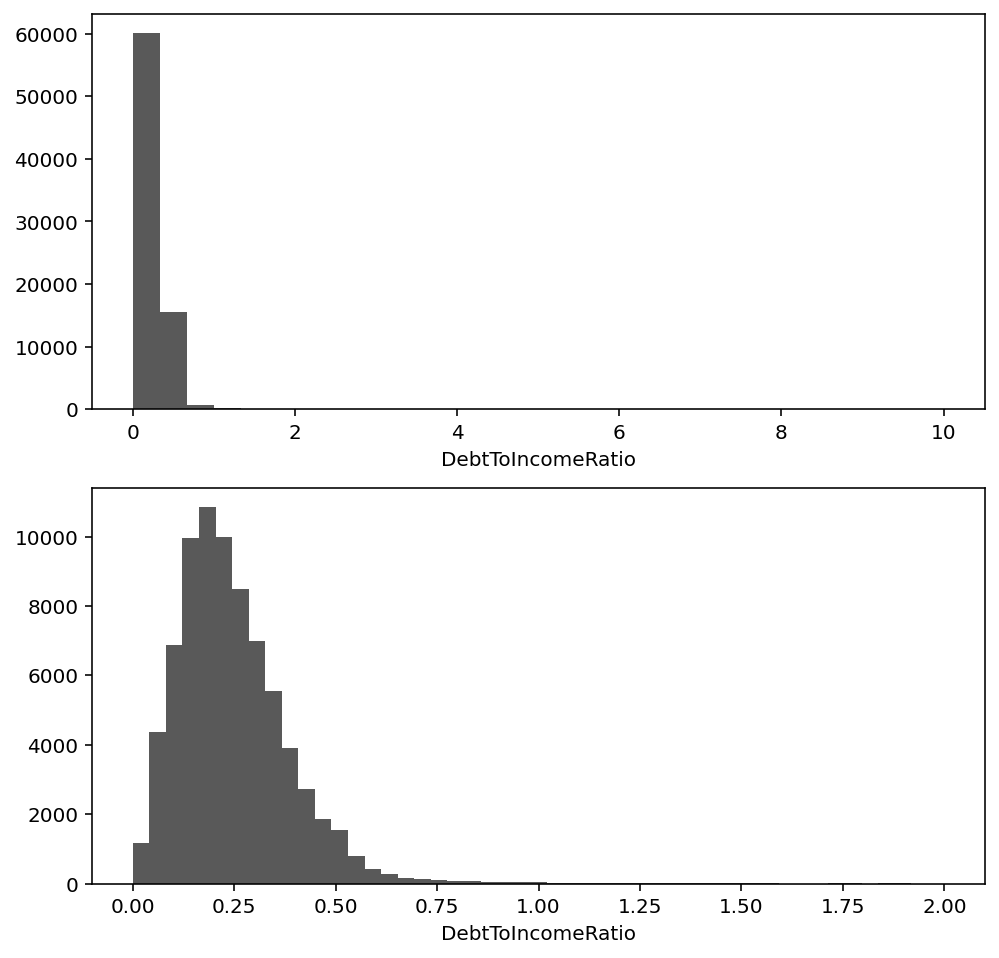

In [25]:
plt.figure(figsize=(8, 8))

# Plot a general distribution with 30 bins.
plt.subplot(2,1,1)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=30, color = main_color)
plt.xlabel('DebtToIncomeRatio');

# Zoom into the distribution and examine closely, with evenly spaced bins
bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins, color = main_color)
plt.xlabel('DebtToIncomeRatio');

#### Observations
>- The distribution of Debt-to-Income ratio is right skewed. Most borrowers seem to prefer taking loans within their means. This can be seen as the bulk of values are distributed between 0 and 1. 
>- Zooming into this distribution, we see a peak around 0.20 and 0.25. This may suggest that borrowers prefer to maintain debt ratios of quarter to one-fifths of their income. This seems like a wise way to live within their means.

Since we have just gathered a few insights from the distribution of debt-to-income ratios, it would be great to see how the actual monthly incomes of borrowers are distributed too. To gather this insight, we will need to explore the **StatedMonthlyIncome** feature:

#### Question Three: How are monthly incomes distributed among borrowers on the platform?
#### Visualization

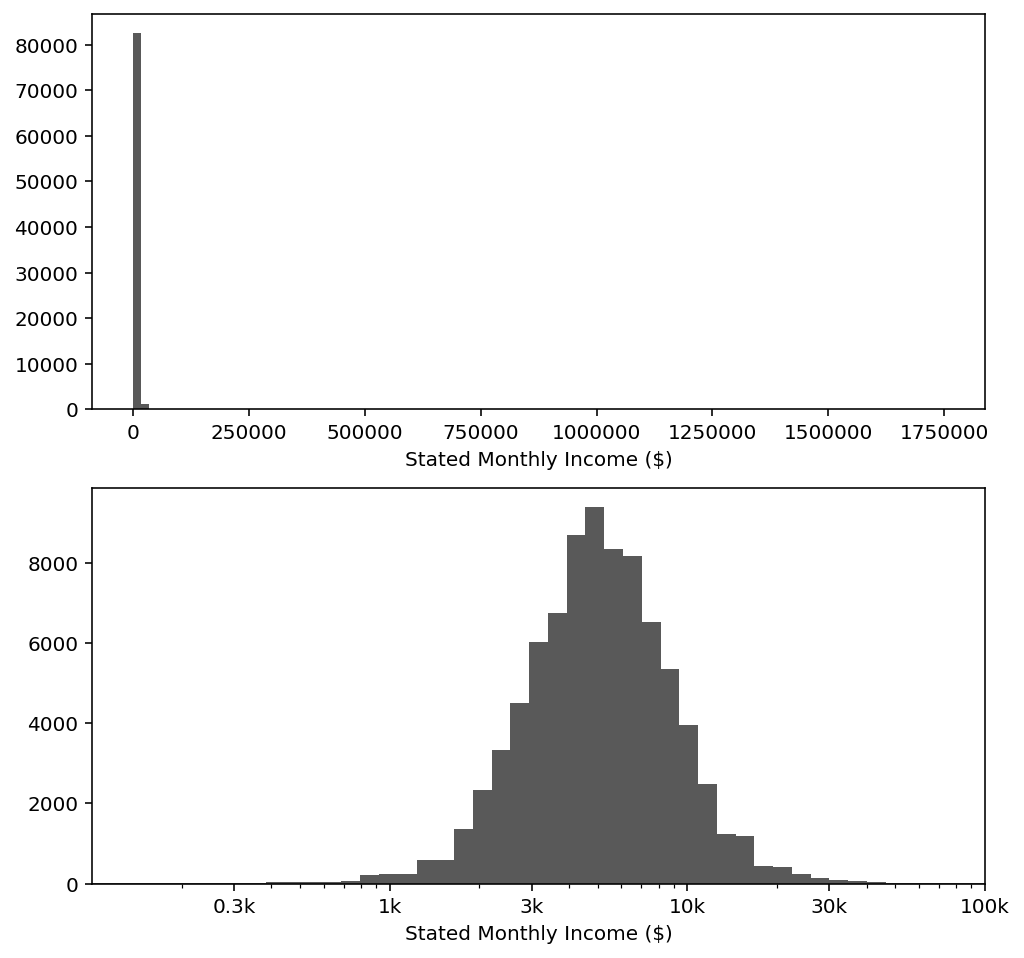

In [26]:
plt.figure(figsize=(8, 8))

# Plot a standard scaled plot
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain')
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=100, color = main_color)
plt.xlabel('Stated Monthly Income ($)');

# Make a transformed plot to account for the severe right skew
plt.subplot(2, 1, 2)
# Transform the highest income value to log scale
bins_max = np.log10(loan_df.StatedMonthlyIncome.max())

# Create 100 evenly transformed bins to hold data groups
bins_trans = 10 ** np.linspace(0, bins_max, 100)
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=bins_trans, color = main_color)

# Convert x axis to logarithmic scale
plt.xscale('log')

# Create evenly spaced x-axis tick marks from 300 - 100,000 USD
plt.xticks([3e2, 1e3, 3e3, 1e4, 3e4, 1e5], 
           ['0.3k', '1k', '3k', '10k', '30k', '100k']);

plt.xlim(1e2, 1e5)
plt.xlabel('Stated Monthly Income ($)');

#### Observations
>- The distribution of stated monthly income is severely right skewed, due to the presence of high earners among the mix. The first plot shows that most borrower incomes are below 250,000 dollars. 
>- Accounting for the large variation in income with a log scale, then zooming into the 0 and 100,000 range, leads us to find that many borrowers earn between 1,000 to 30,000 US dollars monthly, with a peak around 5,000 US dollars.

Next, we will explore the actual loan amounts that borrowers are applying for. This information can be found in the **LoanOriginalAmount** column.

#### Question Four: What is the distribution of loan amounts requested by borrowers?
#### Visualization

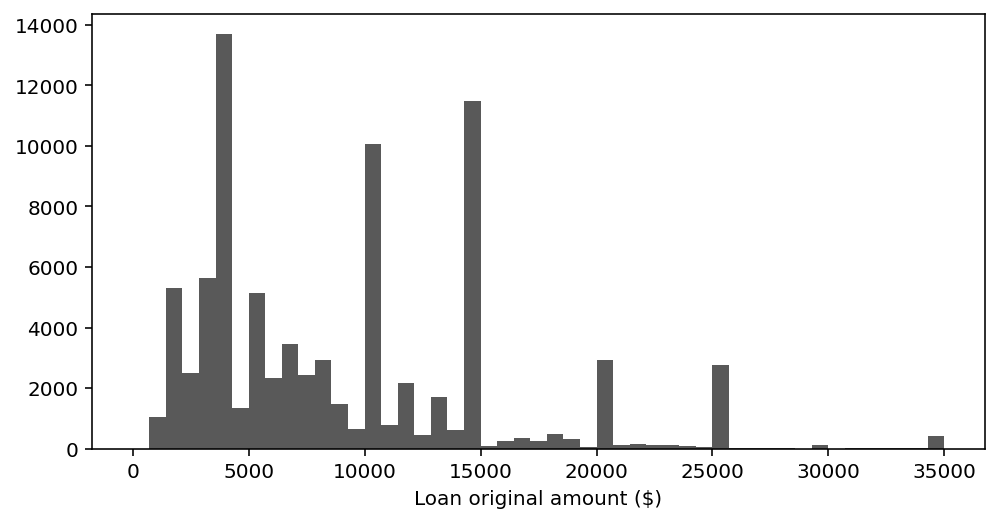

In [27]:
plt.figure(figsize=(8, 4))
bins = np.linspace(0, loan_df.LoanOriginalAmount.max(), 50)
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins, color = main_color)
plt.xlabel('Loan original amount ($)');

#### Observations
>- The loan amounts show interesting spikes arouund multiples of 5,000. This **may** suggest that most borrowers request loans in mutiples of 5,000 for convenience of using a round figure. It is also clear that the majority of the loans do not exceed 15,000 US dollars.